In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import datetime as dt
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns=100
plt.style.use('ggplot')

In [25]:
df=pd.read_csv(r"C:\Users\berid\python\csv_files\data gov\NYPD_Shooting_Incident_Data__Historic_.csv")
nyc=geopandas.read_file(r"C:\Users\berid\python\geopandas\nyc_zip_codes\ZIP_CODE_040114.shp")
nyc = nyc.to_crs('epsg:4326')

In [26]:
df.sample(2)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
17421,138789900,09/19/2014,06:03:00,BRONX,NaN,47,0.0,NaN,NaN,False,NaN,NaN,NaN,45-64,M,BLACK,1024602.000,258763.00000,40.876835,-73.854087,POINT (-73.85408676799995 40.87683497900008)
15466,56373204,02/06/2009,17:15:00,BROOKLYN,NaN,81,0.0,NaN,PVT HOUSE,False,UNKNOWN,M,BLACK,<18,M,BLACK,1001586.375,189839.03125,40.687732,-73.937490,POINT (-73.93749012499995 40.68773229400006)


In [27]:
df=df.replace('(null)',np.nan)
df=df.replace('UNKNOWN',np.nan)

In [28]:
df['OCCUR_DATE']=pd.to_datetime(df['OCCUR_DATE'])

In [29]:
df.insert(2,'OCCUR_HOUR',df['OCCUR_TIME'].str.split(':').str[0].str.strip().astype(int))
df=df.drop(columns='OCCUR_TIME')

In [30]:
df=df.drop(columns=['X_COORD_CD','Y_COORD_CD','X_COORD_CD'])

In [31]:
df.sample(5)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_HOUR,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude,Lon_Lat
23916,193026088,2019-01-31,18,QUEENS,NaN,105,0.0,NaN,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.659865,-73.754982,POINT (-73.75498197399997 40.65986481400006)
15372,25713834,2006-12-11,7,BROOKLYN,NaN,77,0.0,NaN,NaN,True,NaN,M,BLACK,25-44,M,BLACK,40.672144,-73.926631,POINT (-73.92663086199998 40.672143884000036)
25962,245384614,2022-05-16,4,BRONX,OUTSIDE,45,0.0,STREET,NaN,True,25-44,M,BLACK,18-24,M,WHITE HISPANIC,40.875687,-73.801857,POINT (-73.801857 40.875687)
11286,154563863,2016-07-04,1,QUEENS,NaN,113,0.0,NaN,NaN,False,25-44,M,BLACK,25-44,M,BLACK,40.702725,-73.750056,POINT (-73.75005605099994 40.70272543200008)
24571,48304774,2008-07-13,22,BRONX,NaN,40,0.0,NaN,MULTI DWELL - APT BUILD,False,<18,M,BLACK,<18,M,BLACK,40.817725,-73.922609,POINT (-73.92260869999996 40.81772491800007)


# EDA 

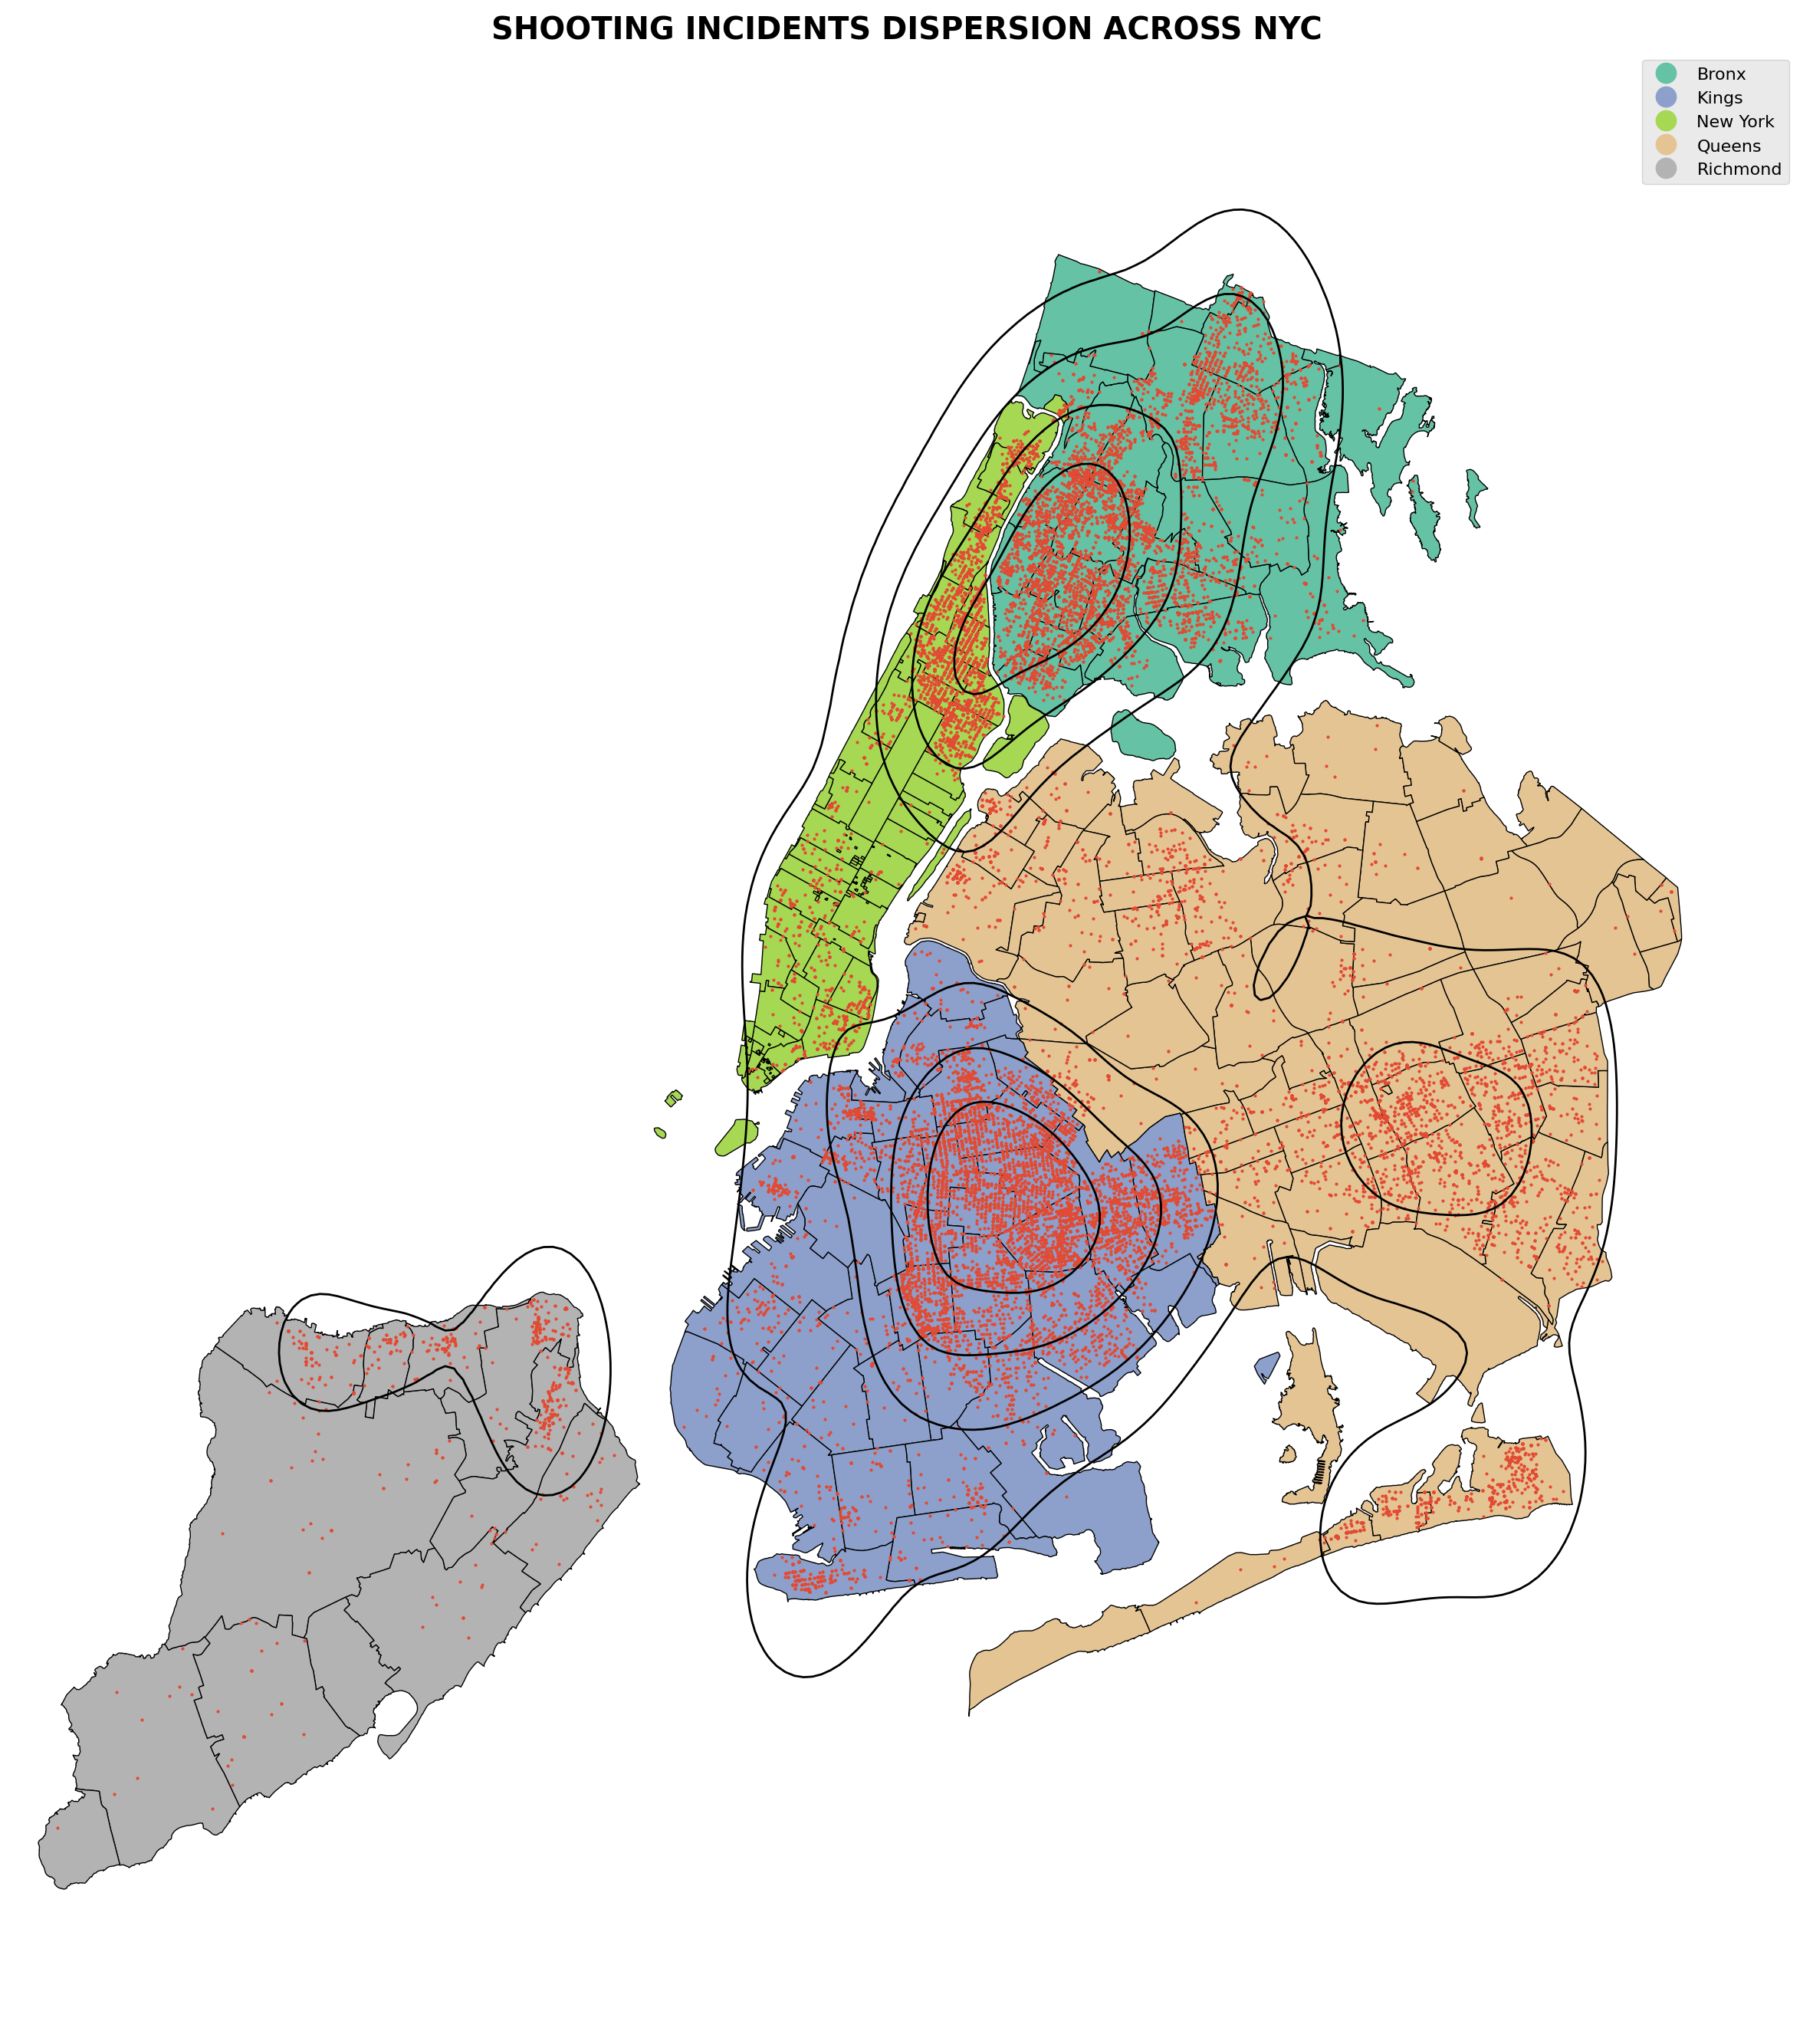

In [48]:
fig,ax=plt.subplots(figsize=(15,20),dpi=200)

nyc.plot(ax=ax,column='COUNTY',legend=True,cmap='Set2',ec='black',legend_kwds={'loc': 'upper right','fontsize':8})
sns.kdeplot(df.sample(10*10**3),x='Longitude',y='Latitude',ax=ax,linewidths=1,color='black',levels=5)
ax.scatter(x=df['Longitude'],y=df['Latitude'],s=1,alpha=1)

ax.set_title('SHOOTING INCIDENTS DISPERSION ACROSS NYC',fontweight='bold')
plt.axis(False)
plt.show()

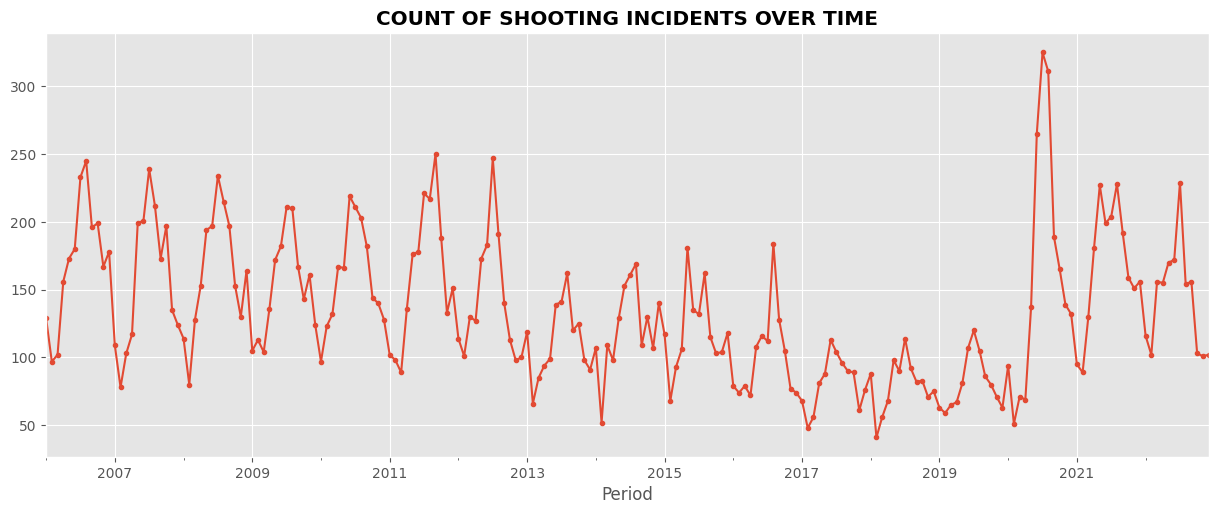

In [33]:
g1=df.groupby(df['OCCUR_DATE'].dt.to_period('M'))['OCCUR_DATE'].count().sort_index(ascending=True)

plt.figure(figsize=(15,5.5))
g1.plot(marker='.')
plt.title('COUNT OF SHOOTING INCIDENTS OVER TIME',fontweight='bold')
plt.xlabel('Period')
plt.show()

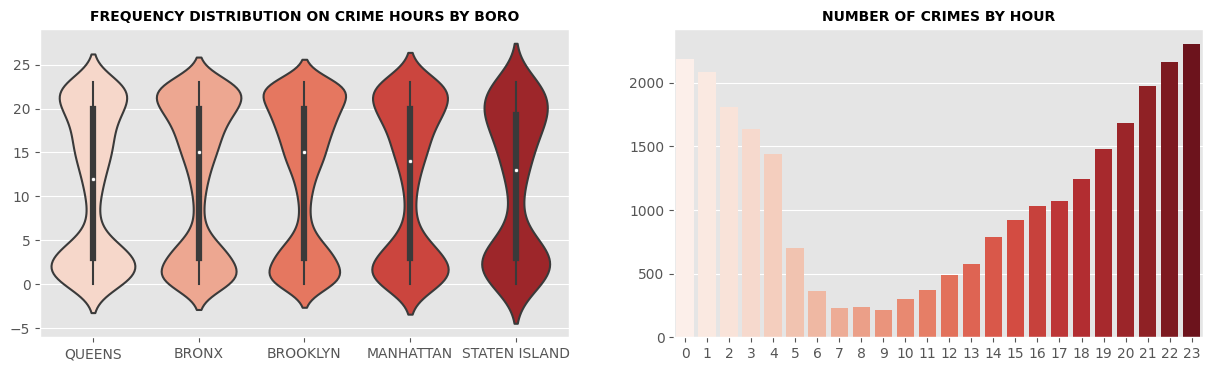

In [34]:
ifg,(ax1,ax2)=plt.subplots(1,2,figsize=(15,4))

sns.violinplot(df,x='BORO',y='OCCUR_HOUR',palette='Reds',ax=ax1)
ax1.set_title('FREQUENCY DISTRIBUTION ON CRIME HOURS BY BORO',fontweight='bold',size=10)
ax1.set_xlabel(''),ax1.set_ylabel('')

sns.countplot(df,x='OCCUR_HOUR',palette='Reds',ax=ax2)
ax2.set_title('NUMBER OF CRIMES BY HOUR',fontweight='bold',size=10)
ax2.set_xlabel(''),ax2.set_ylabel('')

plt.show()

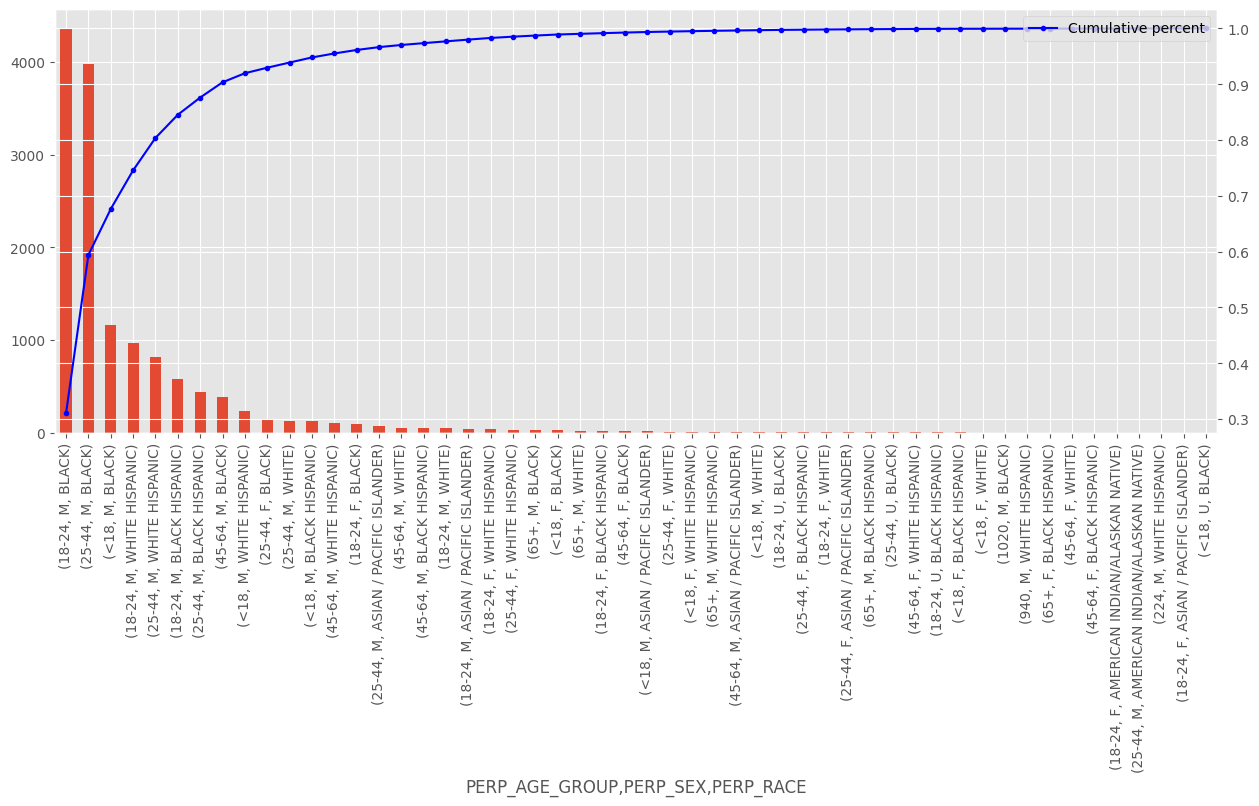

In [35]:
g1=df.groupby(['PERP_AGE_GROUP','PERP_SEX','PERP_RACE'])['INCIDENT_KEY'].count().sort_values(ascending=False)
cumsum=g1.values.cumsum()/g1.values.sum()

fig,ax=plt.subplots(figsize=(15,5.5))
g1.plot.bar(ax=ax,x=g1.index,y=g1.values)
ax2=ax.twinx()
ax2.plot([str(i) for i in g1.index],cumsum,marker='.',color='blue',label='Cumulative percent')
#ax.set_yscale('log')
plt.legend(loc='upper right')
plt.show()

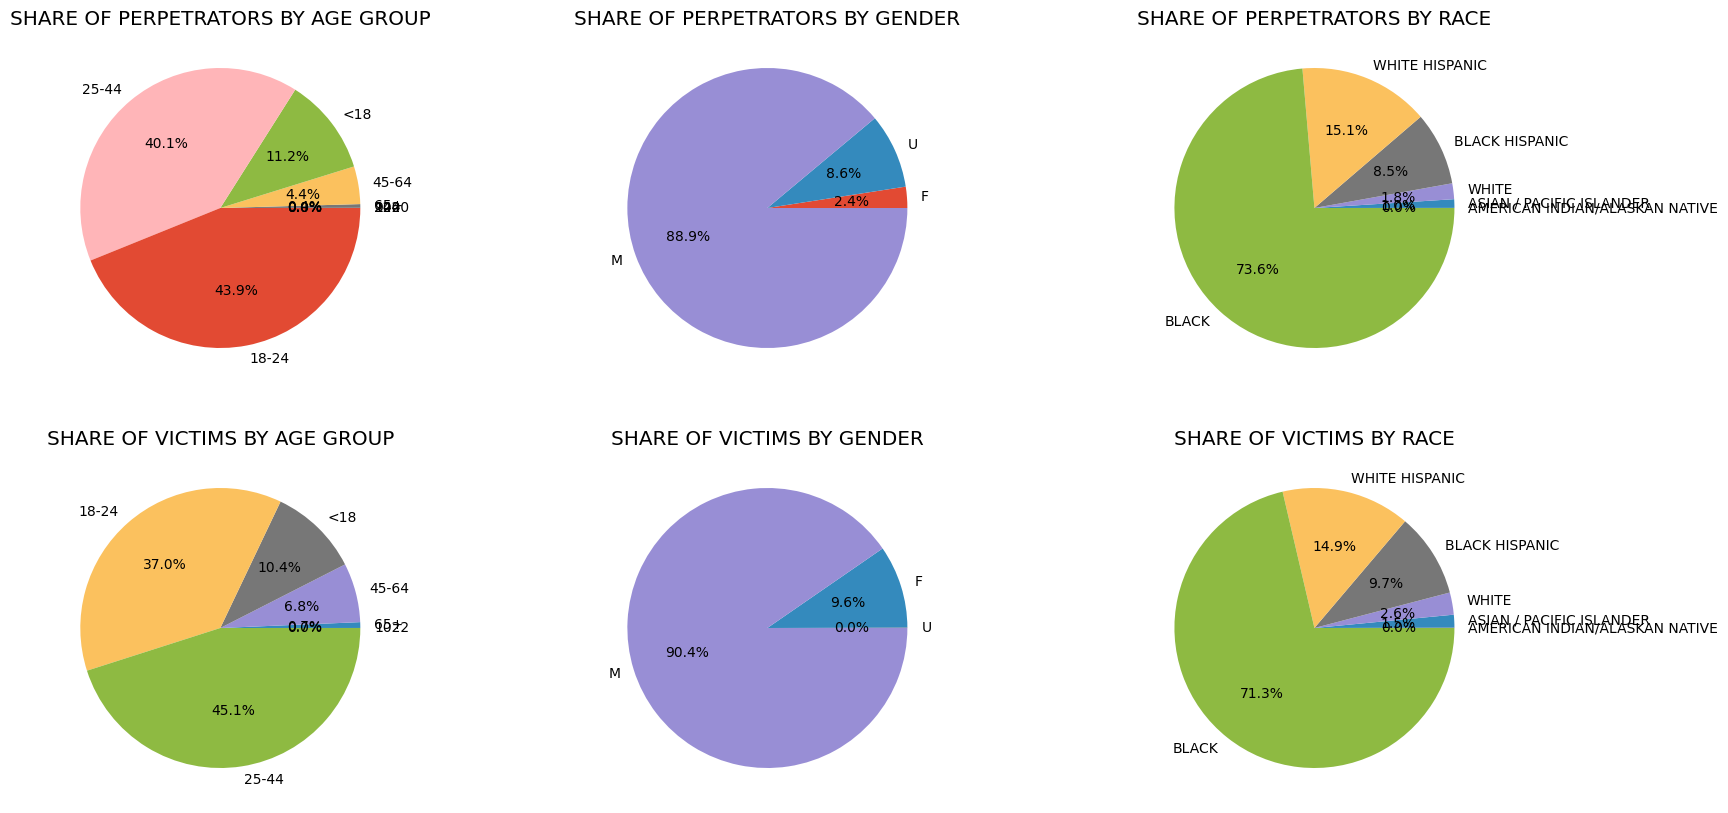

In [36]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(20,10))

df.groupby('PERP_AGE_GROUP')['INCIDENT_KEY'].count().sort_values().plot.pie(ax=ax1,label='',title='SHARE OF PERPETRATORS BY AGE GROUP',autopct='%.1f%%')
df.groupby('PERP_SEX')['INCIDENT_KEY'].count().sort_values().plot.pie(ax=ax2,label='',title='SHARE OF PERPETRATORS BY GENDER',autopct='%.1f%%')
df.groupby('PERP_RACE')['INCIDENT_KEY'].count().sort_values().plot.pie(ax=ax3,label='',title='SHARE OF PERPETRATORS BY RACE',autopct='%.1f%%')

df.groupby('VIC_AGE_GROUP')['INCIDENT_KEY'].count().sort_values().plot.pie(ax=ax4,label='',title='SHARE OF VICTIMS BY AGE GROUP',autopct='%.1f%%')
df.groupby('VIC_SEX')['INCIDENT_KEY'].count().sort_values().plot.pie(ax=ax5,label='',title='SHARE OF VICTIMS BY GENDER',autopct='%.1f%%')
df.groupby('VIC_RACE')['INCIDENT_KEY'].count().sort_values().plot.pie(ax=ax6,label='',title='SHARE OF VICTIMS BY RACE',autopct='%.1f%%')

plt.show()

# ML (Forecasting Number of Accidents By Week)

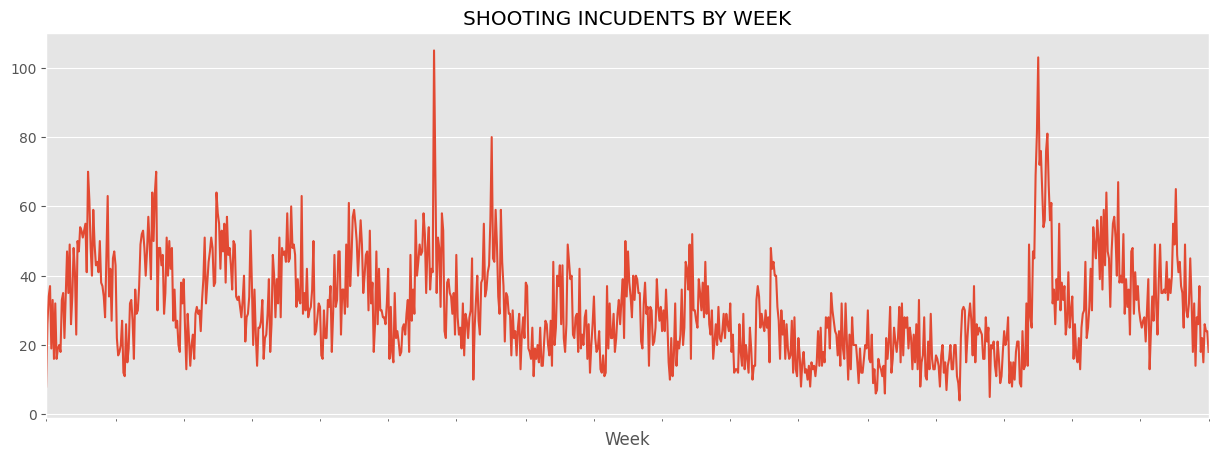

In [37]:
g=df.groupby(df['OCCUR_DATE'].dt.to_period('W'))['INCIDENT_KEY'].count().sort_index(ascending=True)

g.plot.line(figsize=(15,5),title='SHOOTING INCUDENTS BY WEEK',xlabel='Week')
plt.xticks([])
plt.show()

In [38]:
g=g.reset_index()

for i in range(1,13):
    g[f'Prev{i}']=g['INCIDENT_KEY'].shift(i)

g=g.dropna().reset_index(drop=True)
g

,OCCUR_DATE,INCIDENT_KEY,Prev1,Prev2,Prev3,Prev4,Prev5,Prev6,Prev7,Prev8,Prev9,Prev10,Prev11,Prev12
0,2006-03-20/2006-03-26,33,18.0,20.0,19.0,16.0,32.0,16.0,33.0,19.0,37.0,34.0,26.0,8.0
1,2006-03-27/2006-04-02,35,33.0,18.0,20.0,19.0,16.0,32.0,16.0,33.0,19.0,37.0,34.0,26.0
2,2006-04-03/2006-04-09,22,35.0,33.0,18.0,20.0,19.0,16.0,32.0,16.0,33.0,19.0,37.0,34.0
3,2006-04-10/2006-04-16,34,22.0,35.0,33.0,18.0,20.0,19.0,16.0,32.0,16.0,33.0,19.0,37.0
4,2006-04-17/2006-04-23,47,34.0,22.0,35.0,33.0,18.0,20.0,19.0,16.0,32.0,16.0,33.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2022-11-28/2022-12-04,15,22.0,18.0,37.0,26.0,28.0,14.0,32.0,18.0,33.0,45.0,32.0,28.0
872,2022-12-05/2022-12-11,26,15.0,22.0,18.0,37.0,26.0,28.0,14.0,32.0,18.0,33.0,45.0,32.0
873,2022-12-12/2022-12-18,24,26.0,15.0,22.0,18.0,37.0,26.0,28.0,14.0,32.0,18.0,33.0,45.0
874,2022-12-19/2022-12-25,24,24.0,26.0,15.0,22.0,18.0,37.0,26.0,28.0,14.0,32.0,18.0,33.0


In [39]:
border=int(len(g)*0.8)
border

700

In [40]:
train=g.iloc[:700]
test=g.iloc[700:]

X_train,X_test,y_train,y_test=train.drop(columns=['OCCUR_DATE','INCIDENT_KEY']),test.drop(columns=['OCCUR_DATE','INCIDENT_KEY']),train['INCIDENT_KEY'],test['INCIDENT_KEY']

In [41]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn. ensemble import RandomForestRegressor

model=LinearRegression()

from sklearn import metrics

In [42]:
model.fit(X_train,y_train)

LinearRegression()

In [43]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [44]:
r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
print('R2, MAE ,RMSE for train and test data are:')
print(r2_train,r2_test)
print(mae_train,mae_test)
print(rmse_train,rmse_test)

R2, MAE ,RMSE for train and test data are:
0.042735877203214256 0.24352300928662762
7.218163947821941 8.145379246075493
9.333220812545084 10.959950536621987


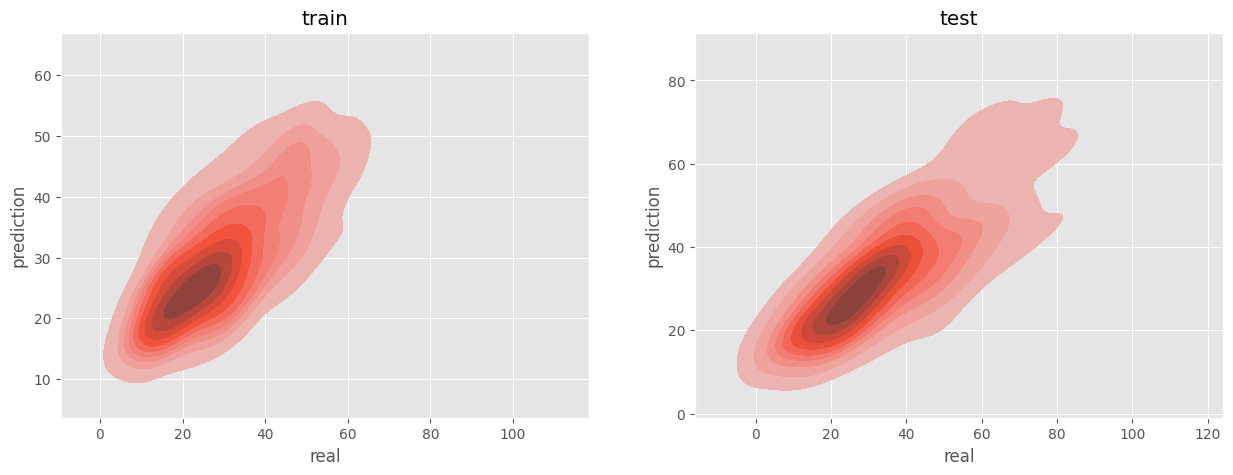

In [45]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.kdeplot(x=y_train,y=train_prediction,fill=True,ax=ax1)
ax1.set_xlabel('real')
ax1.set_ylabel('prediction')
ax1.set_title('train')
sns.kdeplot(x=y_test,y=test_prediction,fill=True,ax=ax2)
ax2.set_xlabel('real')
ax2.set_ylabel('prediction')
ax2.set_title('test')
plt.show()

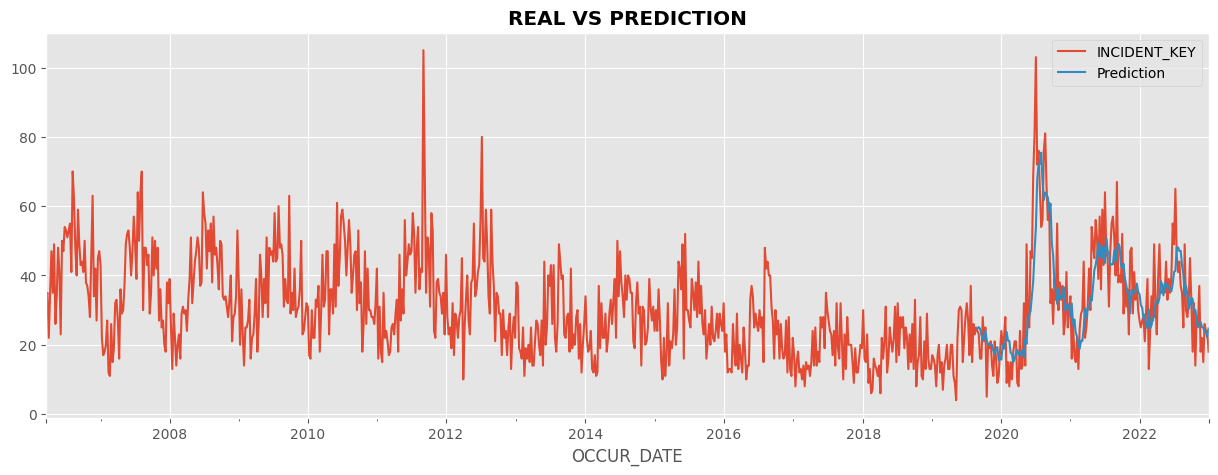

In [46]:
test['Prediction']=test_prediction
data=pd.concat([train,test])


fig,ax=plt.subplots(figsize=(15,5))
data.plot(ax=ax,x='OCCUR_DATE',y=['INCIDENT_KEY','Prediction'])
ax.set_title('REAL VS PREDICTION',fontweight='bold')
plt.show()